# Initialize

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Classifier Libraries
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pennylane as qml
from pennylane import numpy as np
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dropout

from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

In [2]:
import sys
import importlib

# Add the parent directory to sys.path
sys.path.append("..")

# Import and reload the module
import Scripts.data_process_utils as dpu
importlib.reload(dpu)

<module 'Scripts.data_process_utils' from '/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/Submision/Experiments/../Scripts/data_process_utils.py'>

In [3]:
import Scripts.evaluation_functions as eval
import importlib
importlib.reload(eval)

<module 'Scripts.evaluation_functions' from '/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/Submision/Experiments/../Scripts/evaluation_functions.py'>

# Data Loading

In [6]:
finance_df=pd.read_csv("../.././Datasets/PS_20174392719_1491204439457_log.csv",delimiter=',')
finance_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
df=finance_df

In [8]:
# Calculate the number of samples to keep (75% of the original dataset)
num_samples = int(len(df) * 0.10)

# Sample the dataset while maintaining the distribution over the 'steps' column
df_sampled = df.groupby('step', group_keys=False).apply(lambda x: x.sample(frac=0.75, random_state=42))

# Ensure the sampled dataset has the correct number of samples
df_sampled = df_sampled.sample(n=num_samples, random_state=42).reset_index(drop=True)

# Display the sampled dataset
df_sampled

/var/folders/_2/qt54y181481c0ncq4fj6g0940000gn/T/ipykernel_62612/869381217.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df.groupby('step', group_keys=False).apply(lambda x: x.sample(frac=0.75, random_state=42))


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,402,PAYMENT,2293.60,C357857862,82351.00,80057.40,M1737315637,0.00,0.00,0,0
1,226,CASH_OUT,112620.18,C1690757109,128.00,0.00,C1858194355,0.00,112620.18,0,0
2,202,TRANSFER,41450.02,C186607867,7761.00,0.00,C996190755,0.00,41450.02,0,0
3,300,CASH_OUT,88887.47,C997373544,283.00,0.00,C247732967,2395169.12,2484056.59,0,0
4,235,TRANSFER,1059586.98,C1898581284,2010.00,0.00,C418902856,2456601.85,3516188.82,0,0
...,...,...,...,...,...,...,...,...,...,...,...
636257,351,CASH_OUT,49909.02,C634593241,0.00,0.00,C342815345,68820.06,118729.08,0,0
636258,192,PAYMENT,186.28,C47905457,737.00,550.72,M1023854557,0.00,0.00,0,0
636259,183,CASH_IN,125576.66,C726034072,801376.29,926952.95,C194110478,500820.81,375244.15,0,0
636260,397,CASH_IN,283187.53,C1823152342,3758.00,286945.53,C444722207,1001975.52,718788.00,0,0


### Cleaning

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

finance_df = df_sampled

df_cleaned = finance_df.loc[(finance_df['type'].isin(['CASH_OUT', 'TRANSFER'])),:]
df_cleaned.drop(columns=['nameOrig','nameDest','isFlaggedFraud'],inplace=True)
df_cleaned['type'] = finance_df['type'].map({'CASH_OUT': 0, 'TRANSFER': 1})

df_smote_balanced = dpu.balance_with_smote(df_cleaned, target_col='isFraud', smote_ratio=0.1, random_state=42)
fraud_count_smote, fraud_percentage_smote = dpu.count_fraud_percentage(df_smote_balanced)
print(f"After SMOTE - Fraudulent: {fraud_count_smote}, Fraud Percentage: {fraud_percentage_smote:.2f}%")

final_df=df_smote_balanced

final_df = final_df.sort_values(by='step').astype(float)

df=final_df

y = df['isFraud']
X = df.drop(columns=['isFraud'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit only on training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # ✅ Fit only on train
X_test = scaler.transform(X_test)  # ✅ Use same scaler but don't fit again

After SMOTE - Fraudulent: 27621, Fraud Percentage: 9.09%


/var/folders/_2/qt54y181481c0ncq4fj6g0940000gn/T/ipykernel_62612/2877776214.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=['nameOrig','nameDest','isFlaggedFraud'],inplace=True)
/var/folders/_2/qt54y181481c0ncq4fj6g0940000gn/T/ipykernel_62612/2877776214.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['type'] = finance_df['type'].map({'CASH_OUT': 0, 'TRANSFER': 1})


In [10]:
X_train.shape

(243071, 7)

In [11]:
y_train.value_counts()

isFraud
0.0    220934
1.0     22137
Name: count, dtype: int64

Defining a QNode
================



In [49]:
import pennylane as qml
import numpy as np

n_qubits = 3
dev = qml.device("default.qubit", wires=n_qubits+1)

from itertools import combinations

def custom_layer(weights, n_qubits):
    index = 0  # Initialize index to track unique weights

    # Apply first set of RY gates
    for i in range(n_qubits + 1):
        qml.RY(weights[index], wires=i)
        index += 1  # Increment index

    # Apply first set of CNOT gates
    pairs = [(0, 1), (1, 2), (2, 3), (3, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Apply second set of RY gates
    for i in range(n_qubits + 1):
        qml.RY(weights[index], wires=i)
        index += 1  # Increment index

    # Apply second set of CNOT gates
    pairs = [(0, 2), (2, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Apply RY gates on qubit 3
    qml.RY(weights[index], wires=3)
    index += 1  # Increment index
    qml.RY(weights[index], wires=3)
    index += 1  # Increment index

    # Apply nested RY gates for two layers
    for j in range(2):
        for i in range(n_qubits):
            qml.RY(weights[index], wires=i)
            index += 1  # Increment index

    # Apply third set of CNOT gates
    pairs = [(0, 1), (1, 2), (2, 3), (3, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Apply final set of RZ gates
    for i in range(n_qubits + 1):
        qml.RZ(weights[index], wires=i)
        index += 1  # Increment index

@qml.qnode(dev)
def qnode(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits+1))
    # print("AAAAAAAAAAAAAAAAAAAAA")
    # i=0
    for w in weights:
        # print(i)
        custom_layer(w,n_qubits)
        # i+=1
    outputs = [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]
    return outputs


In [50]:
import pennylane as qml
import numpy as np

n_qubits = 3
dev = qml.device("default.qubit", wires=n_qubits+1)

from itertools import combinations

def custom_layer_long(weights, n_qubits):
    index = 0  # Start index for weights

    # First block of RY
    for i in range(n_qubits + 1):
        qml.RY(weights[index], wires=i)
        index += 1

    # First set of CNOT pairs
    pairs = [(0, 1), (1, 2), (2, 3), (3, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Second block of RY
    for i in range(n_qubits + 1):
        qml.RY(weights[index], wires=i)
        index += 1

    # Second set of CNOT pairs
    pairs = [(0, 2), (2, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Third block of RY (single qubit repeated)
    qml.RY(weights[index], wires=3)
    index += 1
    qml.RY(weights[index], wires=3)
    index += 1

    # Nested loop of RY
    for j in range(2):
        for i in range(n_qubits):
            qml.RY(weights[index], wires=i)
            index += 1

    # Third set of CNOT pairs
    pairs = [(0, 1), (1, 2), (2, 3), (3, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # First block of RZ
    for i in range(n_qubits + 1):
        qml.RZ(weights[index], wires=i)
        index += 1

    # Fourth set of CNOT pairs
    pairs = [(0, 2), (2, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Fourth block of RY (single qubit repeated)
    qml.RZ(weights[index], wires=3)
    index += 1
    qml.RY(weights[index], wires=3)
    index += 1

    # Second block of RZ
    for i in range(n_qubits):
        qml.RZ(weights[index], wires=i)
        index += 1

    # Third block of RY
    for i in range(n_qubits):
        qml.RY(weights[index], wires=i)
        index += 1

    # Fifth set of CNOT pairs
    pairs = [(0, 1), (1, 2), (2, 3), (3, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Final block of RZ
    for i in range(n_qubits + 1):
        qml.RZ(weights[index], wires=i)
        index += 1

    return index  # Total number of indices used

@qml.qnode(dev)
def qnode_long(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits+1))
    # print("AAAAAAAAAAAAAAAAAAAAA")
    # i=0
    for w in weights:
        # print(i)
        custom_layer_long(w,n_qubits)
        # i+=1
    outputs = [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]
    return outputs

In [51]:
@qml.qnode(dev)
def qnode_long_solo(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits+1))
    for w in weights:
        custom_layer_long(w,n_qubits)
    outputs = [qml.expval(qml.PauliZ(wires=0)),qml.expval(qml.PauliZ(wires=1))]
    return outputs

# Quantum Circuit



In [52]:
import pennylane as qml
import matplotlib.pyplot as plt

In [53]:
n_layers = 1
n_qubits=3
total_weights = 3 * (n_qubits + 1) + 2 * n_qubits + 2

weight_shapes = {"weights": (n_layers, total_weights+1)}

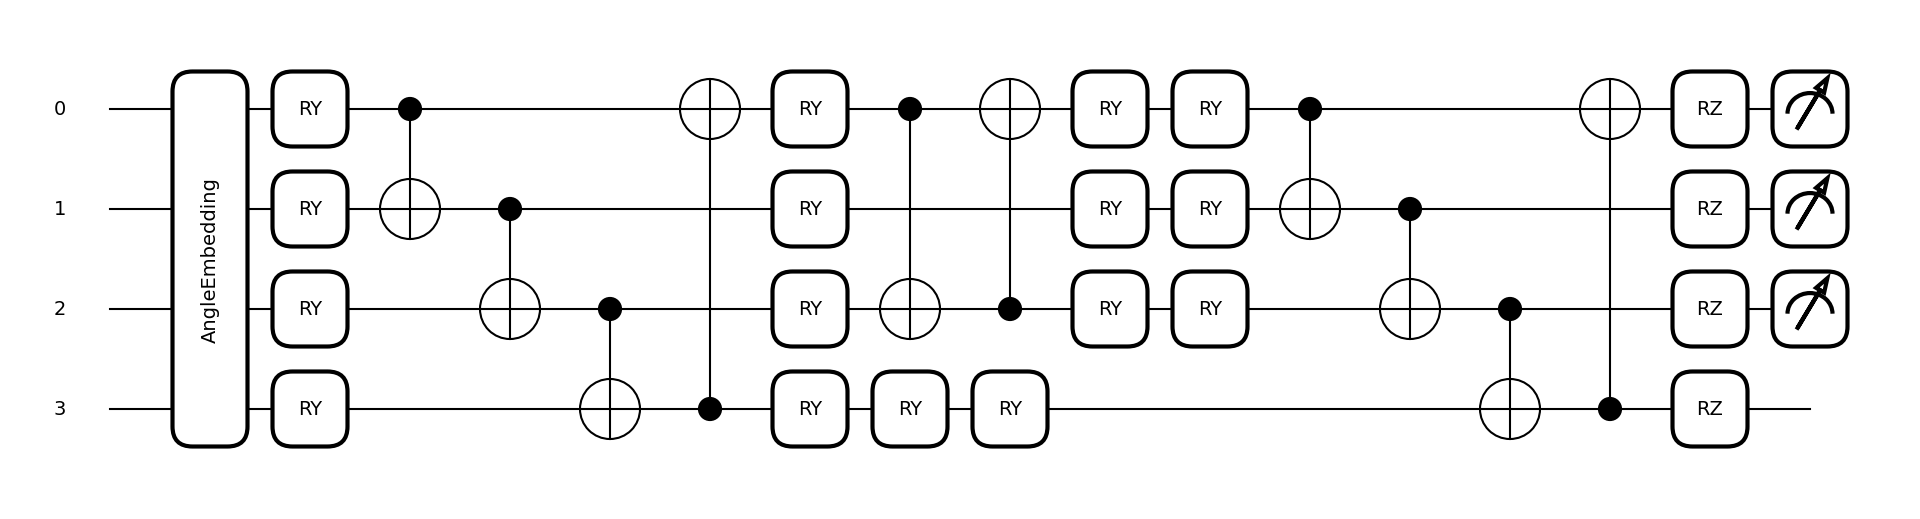

In [54]:
weights = np.random.random(size=(n_layers, total_weights))
fig, ax = qml.draw_mpl(qnode)(X_train[:, :4], weights)
plt.show()

In [55]:
n_layers = 1
n_qubits=3
total_weights_long = 36
print("Total weights required:", total_weights_long)

weight_shapes_long = {"weights": (n_layers, total_weights_long+1)}

Total weights required: 36


In [56]:
weights = np.random.random(size=(n_layers, total_weights_long))
fig, ax = qml.draw_mpl(qnode_long)(X[:, :4], weights)

plt.show()

InvalidIndexError: (slice(None, None, None), slice(None, 4, None))

In [136]:
qlayer = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits)

In [137]:
qlayer_long = qml.qnn.KerasLayer(qnode_long, weight_shapes_long, output_dim=n_qubits)

# Checking The Influence of Quantum Model

For this to be implemented we lowered the amount of data used to have a faster run of the quantum circuit

In [57]:
from sklearn.metrics import classification_report

In [58]:
n_layers = 1
n_qubits=3
total_weights_long = 32
print("Total weights required:", total_weights_long)

weight_shapes_long = {"weights": (n_layers, total_weights_long+1)}

Total weights required: 32


In [59]:
qlayer_long = qml.qnn.KerasLayer(qnode_long, weight_shapes_long, output_dim=n_qubits)

In [141]:
# import pandas as pd

# X_train_df = pd.DataFrame(X_train)
# Y_train_df = pd.DataFrame(y_train)
# X_test_df = pd.DataFrame(X_test)
# y_test_df = pd.DataFrame(y_test)

# X_train_df.to_csv('X_train.csv', index=False)
# Y_train_df.to_csv('y_train.csv', index=False)
# X_test_df.to_csv('X_test.csv', index=False)
# y_test_df.to_csv('y_test.csv', index=False)

In [62]:
import os

model_dir = "Experiment_Long_Layer_Models"
os.makedirs(model_dir, exist_ok=True)
q_all_train_loss = []
q_all_val_loss = []
print("Evaluating Quantum Model")

for i in range(5):
    quantum_model = Sequential([
        Dense(4, activation=tf.nn.relu, input_shape=(X_train.shape[1],)),
        qlayer_long,
        Dense(2, activation=tf.nn.softmax)
    ])

    quantum_model.compile(optimizer=Adam(learning_rate=0.01), 
                          loss='sparse_categorical_crossentropy', 
                          metrics=['accuracy'])

    with tf.device('/CPU:0'):
        history = quantum_model.fit(X_train, y_train, 
                          validation_split=0.2, 
                          batch_size=256, 
                          epochs=5, 
                          shuffle=True, 
                          verbose=1)
        
    eval.evaluate_model(quantum_model, X_test, y_test)
    # Save model weights
    weights_path = os.path.join(model_dir, f"quantum_model_iteration_{i+1}_weights.h5")
    quantum_model.save_weights(weights_path)
    print(f"Iteration {i+1}: Model weights saved successfully at {weights_path}.")
    print("=" * 100)
    
    # Store loss values for plotting later
    train_loss = history.history['loss']
    val_loss   = history.history['val_loss']
    q_all_train_loss.append(train_loss)
    q_all_val_loss.append(val_loss)

Evaluating Quantum Model
Epoch 1/5
760/760 [==============================] - 69s 90ms/step - loss: 0.1453 - accuracy: 0.9505 - val_loss: 0.0772 - val_accuracy: 0.9736
Epoch 2/5
760/760 [==============================] - 70s 92ms/step - loss: 0.0716 - accuracy: 0.9759 - val_loss: 0.0683 - val_accuracy: 0.9774
Epoch 3/5
760/760 [==============================] - 72s 95ms/step - loss: 0.0616 - accuracy: 0.9788 - val_loss: 0.0568 - val_accuracy: 0.9807
Epoch 4/5
760/760 [==============================] - 72s 95ms/step - loss: 0.0587 - accuracy: 0.9797 - val_loss: 0.0588 - val_accuracy: 0.9811
Epoch 5/5
475/475 [==============================] - 15s 31ms/step
Confusion Matrix:
[[55020   264]
 [  839  4645]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     55284
         1.0       0.95      0.85      0.89      5484

    accuracy                           0.98     60768
   macro avg       0.97      0.92      0.94  

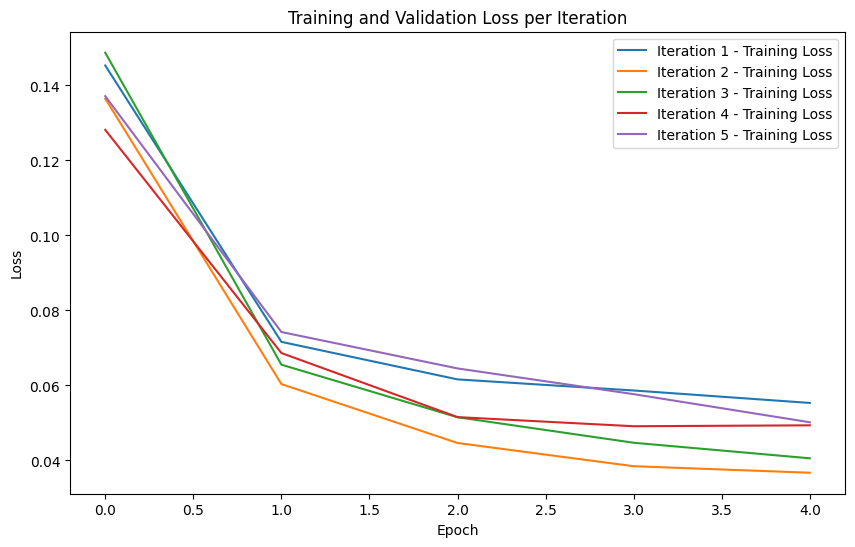

In [63]:
# Plot the training and validation loss after all iterations
plt.figure(figsize=(10,6))
for i in range(5):
    plt.plot(q_all_train_loss[i], label=f'Iteration {i+1} - Training Loss')
    # plt.plot(q_all_val_loss[i], label=f'Iteration {i+1} - Validation Loss')

plt.title('Training and Validation Loss per Iteration')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [61]:
import os
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

model_dir = "Experiment_6"
os.makedirs(model_dir, exist_ok=True)

# Keep track of losses across all iterations
all_train_loss = []
all_val_loss = []

print("Evaluating Classical Model")
for i in range(5):
    # Build a simple model (change architecture as you see fit)
    classical_model = Sequential([
        Dense(4, activation=tf.nn.relu, input_shape=(X_train.shape[1],)),
        Dense(2, activation=tf.nn.softmax)
    ])

    classical_model.compile(
        optimizer=Adam(learning_rate=0.01), 
        loss='sparse_categorical_crossentropy', 
        metrics=['accuracy']
    )

    with tf.device('/CPU:0'):
        history = classical_model.fit(
            X_train, 
            y_train, 
            validation_split=0.2, 
            batch_size=256, 
            epochs=5, 
            shuffle=True, 
            verbose=1
        )
    
    
    eval.evaluate_model(classical_model, X_test, y_test)
    
    # Save model weights
    weights_path = os.path.join(model_dir, f"classical_model_iteration_{i+1}_weights.h5")
    classical_model.save_weights(weights_path)
    print(f"Iteration {i+1}: Model weights saved successfully at {weights_path}.")
    print("=" * 100)
    
    # Store loss values for plotting later
    train_loss = history.history['loss']
    val_loss   = history.history['val_loss']
    all_train_loss.append(train_loss)
    all_val_loss.append(val_loss)

Evaluating Classical Model
Epoch 1/5
760/760 [==============================] - 1s 446us/step - loss: 0.1321 - accuracy: 0.9567 - val_loss: 0.0778 - val_accuracy: 0.9739
Epoch 2/5
760/760 [==============================] - 0s 381us/step - loss: 0.0687 - accuracy: 0.9769 - val_loss: 0.0605 - val_accuracy: 0.9796
Epoch 3/5
760/760 [==============================] - 0s 380us/step - loss: 0.0560 - accuracy: 0.9807 - val_loss: 0.0499 - val_accuracy: 0.9827
Epoch 4/5
760/760 [==============================] - 0s 356us/step - loss: 0.0501 - accuracy: 0.9824 - val_loss: 0.0473 - val_accuracy: 0.9820
Epoch 5/5
475/475 [==============================] - 0s 207us/step
Confusion Matrix:
[[55105   179]
 [  737  4747]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     55284
         1.0       0.96      0.87      0.91      5484

    accuracy                           0.98     60768
   macro avg       0.98      0.93      0.95

In [99]:
import os

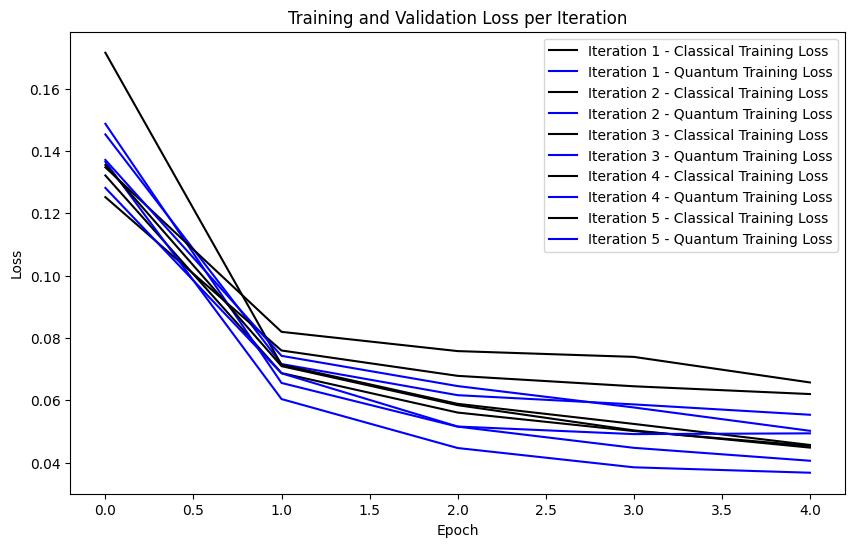

In [64]:
plt.figure(figsize=(10,6))


for i in range(5):
    plt.plot(all_train_loss[i], color='black', linestyle='-', label=f'Iteration {i+1} - Classical Training Loss')
    plt.plot(q_all_train_loss[i], color='blue', linestyle='-', label=f'Iteration {i+1} - Quantum Training Loss')

    # plt.plot(all_val_loss[i], label=f'Iteration {i+1} - Validation Loss')

plt.title('Training and Validation Loss per Iteration')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
